# Long-Term-Short-Term-Memory Neural Networks

# Mathematical Definitions

**Definition (LSTM):** A *Long-Term-Short-Term-Memory neural network* is a tuple $\operatorname{LSTM}=\operatorname{LSTM}(W,U,b,\tau,\sigma)$ consisting of
* a number $m$ of units and a number $k$ of features, 
* a $4$-tuple $W$ of matrices $W_i, W_f, W_c, W_o \in \mathbb{R}^{k \times m}$ called *input, forget, cell and output kernels*,
* a $4$-tuple $U$ of matrices $U_i, U_f, U_c, U_o \in \mathbb{R}^{m \times m}$ called *input, forget, cell and output recurrent kernels*,
* a $4$-tuple $b$ of vectors $b_i, b_f, b_c, b_o \in \mathbb{R}^{m}$ called *input, forget, cell and output bias*,
* two functions $\sigma, \tau:\mathbb{R} \to \mathbb{R}$ called *activation* and *recurrent activation*.

**Definition (feedforward):** Let $\operatorname{LSTM}=\operatorname{LSTM}(W,U,b,\tau,\sigma)$ be as above and let $T \in \mathbb{N}$ be a natural number. Any sequence $x = (x_1, \ldots, x_T)$, $x_t \in \mathbb{R}^{k}$, is called an *input sequence*. The two sequences $c_t$ and $h_t$, $t=1, \ldots, T$, called *cell state* and *carry state*, are recursively defined as follows:

\begin{align}
\text{input: } i_t &:= \tau(x_t \odot W_i + h_{t-1} \odot U_i + b_i) \in \mathbb{R}^m,\\
\text{forget: } f_t &:= \tau(x_t \odot W_f + h_{t-1} \odot U_f + b_f) \in \mathbb{R}^m,\\
\text{candidate: } \tilde c_t &:= \sigma(x_t \odot W_c + h_{t-1} \odot U_c + b_c) \in \mathbb{R}^m, \\
\text{output: } o_t &:= \tau(x_t \odot W_o  + h_{t-1} \odot U_o + b_o) \in \mathbb{R}^m,\\
\text{cell: } c_t &:= f_t \bullet c_{t-1} + i_t \bullet \tilde c_t \in \mathbb{R}^m,\\
\text{carry: }h_t & := o_t \tau(c_t) \in \mathbb{R}^m.
\end{align}

Here, we employ the following notation conventions:
* all vectors are row vectors, i.e. we identify $\mathbb{R}^{k} \cong \mathbb{R}^{1 \times k}$ and $\mathbb{R}^{m} \cong \mathbb{R}^{1 \times m}$,
* the sequences are zero initialized, i.e. $c_{0} := 0$, $h_{0} := 0$,
* $\odot$ denotes the usual matrix-vector multiplication,
* $\bullet$ denotes the element-wise multiplication of vectors.
* the application of a function $\mathbb{R} \to \mathbb{R}$, e.g. $\sigma$ and $\tau$, to a vector is performed element-wise.

Finally, the function $F_T: \mathbb{R}^{k \times T} \to \mathbb{R}^{m}$, $x=(x_1, \ldots, x_T) \mapsto h_T$ is called, the *feedforward of $\operatorname{LSTM}$ of length $T$*.

# Graphical Illustration

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

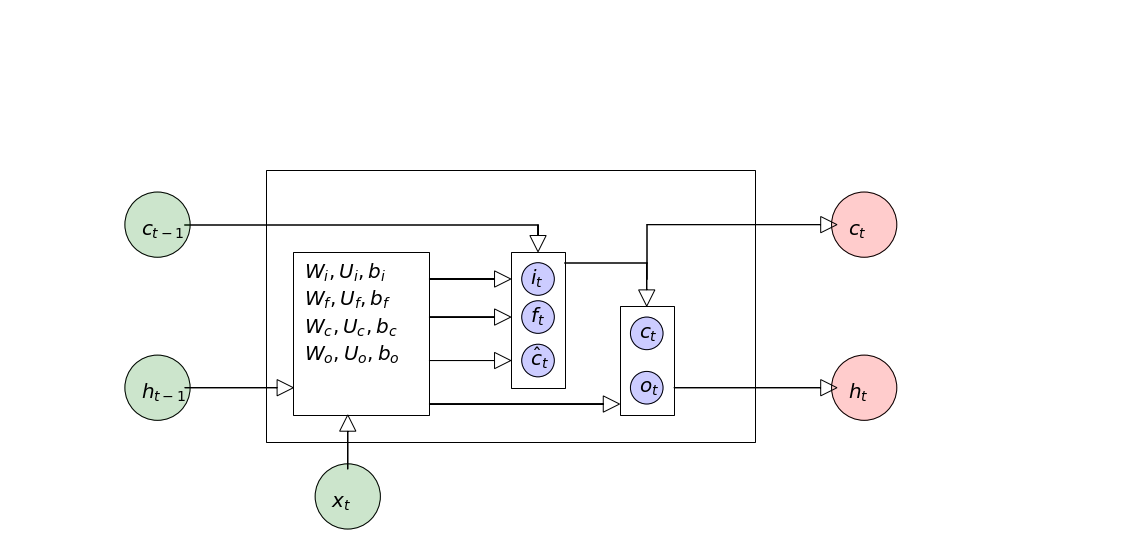

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis("equal")
xs = 1
ys = 1
radius = 0.6
fsize = 20

def add_circle(x, y, label, color='r', radius=radius):
    c1 = plt.Circle((x, y), radius, alpha=0.2, color=color, zorder=1)
    c2 = plt.Circle((x, y), radius, color='k', fill=False, zorder=1)
    ax.add_artist(c1)
    ax.add_artist(c2)
    ax.text(x-radius/2, y-radius/3, label, size=fsize)
    
def add_rectangle(x, y, width, height, fill, color='white'):
    rect = patches.Rectangle((x,y), width, height, linewidth=1, edgecolor='k', facecolor='none', fill=False)
    ax.add_patch(rect)
    
def add_line(x1, x2, y1, y2):
    ax.plot([x1, x2], [y1, y2], color='k', zorder=-1)
    
def add_arrow(x, y, dx, dy):
    plt.arrow(x, y, dx, dy, head_width=0.3, head_length=0.3,  length_includes_head=True, fill=False)

    
add_circle(0, 2*ys, label="$h_{t-1}$", color='g')
add_circle(0, 5*ys, label="$c_{t-1}$", color='g')
add_circle(3.5*xs, 0, label="$x_{t}$", color='g')
add_circle(13, 5*ys, label="$c_{t}$", color='r')
add_circle(13, 2*ys, label="$h_{t}$", color='r')

add_circle(7*xs, 4*ys, label="$i_t$", color='b', radius=0.3)
add_circle(7*xs, 3.3*ys, label="$f_t$", color='b', radius=0.3)
add_circle(7*xs, 2.5*ys, label="${\hat c_t}$", color='b', radius=0.3)

add_circle(9*xs, 2*ys, label="$o_t$", color='b', radius=0.3)
add_circle(9*xs, 3*ys, label="$c_t$", color='b', radius=0.3)

add_rectangle(2*xs, 1*xs, 9*xs, 5*ys, False)
add_rectangle(2.5*xs, 1.5*ys, 2.5*xs, 3*ys, False)
add_rectangle(6.5*xs, 2*ys, 1.*xs, 2.5*ys, False)
add_rectangle(8.5*xs, 1.5*ys, 1.*xs, 2.*ys, False)

add_arrow(3.5*xs, 0.5*ys, 0, 1*ys)
add_arrow(0.5*xs, 2*ys, 2*xs, 0)

add_arrow(5*xs, 4*ys, 1.5*xs, 0)
add_arrow(5*xs, 3.3*ys, 1.5*xs, 0)
add_arrow(5*xs, 2.5*ys, 1.5*xs, 0)

add_arrow(5*xs, 1.7*ys, 3.5*xs, 0)

add_line(0.5*xs, 7*xs, 5*ys, 5*ys)
add_arrow(7*xs, 5*ys, 0, -0.5*ys)

add_line(7.5*xs, 9*xs, 4.3*ys, 4.3*ys)
add_arrow(9.*xs, 4.3*ys, 0, -.8*ys)
add_arrow(9*xs, 5*ys, 3.5*xs, 0)
add_line(9*xs, 9*xs, 4*ys, 5*ys)
add_arrow(9.5*xs, 2*ys, 3*xs, 0)

ax.text(2.7*xs, 4*ys, "$W_i, U_i, b_i$", size=fsize)
ax.text(2.7*xs, 3.5*ys, "$W_f, U_f, b_f$", size=fsize)
ax.text(2.7*xs, 3*ys, "$W_c, U_c, b_c$", size=fsize)
ax.text(2.7*xs, 2.5*ys, "$W_o, U_o, b_o$", size=fsize)

ax.set_xlim([7, 8])
ax.set_ylim([-1,9])
_ = plt.axis('off')

The recurion in the feedforward computation can be visualised using *gates* as above. 

# Implementation in Keras

In [3]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

Using TensorFlow backend.


## Setting up the model
Seting up an LSTM in `keras` is straightforward as `keras` has a pre-defined `LSTM` layer for that.

In [4]:
num_features = 2
num_units = 3
num_time_steps = 4

model = Sequential()
model.add(LSTM(input_shape=(num_time_steps,num_features),
               units=num_units,
               activation='tanh',
               recurrent_activation='sigmoid',
               use_bias=True))
model.compile(optimizer='adam', loss='MAE')

## Inspecting the model

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3)                 72        
Total params: 72
Trainable params: 72
Non-trainable params: 0
_________________________________________________________________


## Inspecting the weights

In [6]:
model.get_weights()

[array([[ 0.50340784, -0.12078702,  0.18457556, -0.11112088,  0.29192066,
         -0.47658253, -0.6178991 , -0.15271163, -0.52941227, -0.37946683,
          0.36668968, -0.4522909 ],
        [-0.2250542 , -0.5154723 ,  0.25769663,  0.6456047 , -0.08994985,
          0.0361858 , -0.05952704, -0.09793669,  0.5040399 , -0.0219382 ,
          0.2320326 , -0.58652467]], dtype=float32),
 array([[ 0.2596882 ,  0.09325878, -0.04556034,  0.31354126,  0.11536334,
          0.30306134, -0.48573062,  0.31603098,  0.11134358, -0.2701919 ,
         -0.3152185 ,  0.44469374],
        [-0.19635291,  0.16269928, -0.02586733, -0.34431586,  0.4343273 ,
         -0.3841725 ,  0.13582139, -0.12067506,  0.06685021, -0.53689194,
          0.04097676,  0.39001578],
        [-0.08719516, -0.25546166,  0.44736108,  0.07002803, -0.26425323,
         -0.33667588, -0.19272438,  0.20728208, -0.52333117, -0.37160158,
         -0.14764304, -0.1582713 ]], dtype=float32),
 array([0., 0., 0., 1., 1., 1., 0., 0., 0., 0.

## Feedforward

In [7]:
x = np.arange(num_time_steps *num_features).reshape(num_time_steps, num_features) # this creates an input layer
X = x[np.newaxis,:,:] # usually multiple inputs are processed, which is why this additional axis is needed
Y = model.predict(X)  # computes the actual result
y = Y[0] # in this example, we only have 1 output

## Reproduce the computation

In [8]:
# extracting the weights
W, U, b = model.layers[0].get_weights()

W_i = W[:, :num_units]
W_f = W[:, num_units: num_units * 2]
W_c = W[:, num_units * 2: num_units * 3]
W_o = W[:, num_units * 3:]

U_i = U[:, :num_units]
U_f = U[:, num_units: num_units * 2]
U_c = U[:, num_units * 2: num_units * 3]
U_o = U[:, num_units * 3:]

b_i = b[:num_units]
b_f = b[num_units: num_units * 2]
b_c = b[num_units * 2: num_units * 3]
b_o = b[num_units * 3:]


# setting the activations
activation = np.tanh
recurrent_activation = lambda x : 1/(1+np.exp(-x))

In [9]:
def lstm_feedforward_step(xt, c_tm1, h_tm1):
    """
    Computes one time step in the feedforward of the LSTM.
    
    param xt: The input at time t; of shape (1, num_features)
    param c_tm1: The cell state at time t-1; of shape (1, num_features)
    param h_tm1: The carry at time t-1; of shape (1, num_features)
    
    returns: (h, c), i.e. a tuple with the cell state at time t and the carry state at time t; both of shape (1, num_features)
    """
    
    i = recurrent_activation(xt @ W_i + b_i + h_tm1 @ U_i)
    f = recurrent_activation(xt @ W_f + b_f + h_tm1 @ U_f)
    cc = activation(xt @ W_c + b_c + h_tm1 @ U_c)
    c = f * c_tm1 + i * cc
    o = recurrent_activation(xt @ W_o + b_o + h_tm1 @ U_o)
    h = o * activation(c)
    
    return h, c


h_tm1 = np.zeros(num_units)
c_tm1 = np.zeros(num_units)

for t in range(num_time_steps):
    h_tm1, c_tm1 = lstm_feedforward_step(x[np.newaxis, t, :], c_tm1, h_tm1)

h = h_tm1

In [10]:
np.testing.assert_array_almost_equal(Y,h)

# References, Background Material & Further Reading

https://keras.io/layers/recurrent/

https://adventuresinmachinelearning.com/keras-lstm-tutorial/

https://stackoverflow.com/questions/42861460/how-to-interpret-weights-in-a-lstm-layer-in-keras

https://github.com/keras-team/keras/blob/master/keras/layers/recurrent.py#L1863

http://deeplearning.net/tutorial/lstm.html

https://stackoverflow.com/questions/51199753/extract-cell-state-lstm-keras

https://stats.stackexchange.com/questions/221513/why-are-the-weights-of-rnn-lstm-networks-shared-across-time